In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Big Projects/Project StarMart/Datasets

C:\Users\shrav\Data_Analysis_Projects\Big Projects\Project StarMart\Datasets


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Customers 
df = pd.read_csv("StarMart_Customers.csv")
df.head()

,customer_id,name,age,gender,phone_number,email,address,recurring,membership
0,STRMRT_CSTMR_1,Aimee Bowman,23,Female,+1(312)-636-1903,aimeebowman13126361903@gmail.com,"#2622, S Morgan St, Bridgeport, Central, Chicago",One Time Customer,0
1,STRMRT_CSTMR_2,Jennifer Davis,27,Female,+1(312)-100-2286,jenniferdavis13121002286@yahoo.com,"#2760, N Pulaski Rd, Edgewater, North, Chicago",One Time Customer,0
2,STRMRT_CSTMR_3,Amanda Mills,39,Female,+1(872)-604-6292,amandamills18726046292@hotmail.com,"#9817, W Madison St, Near West Side, Central, ...",One Time Customer,0
3,STRMRT_CSTMR_4,Zachary Merritt,50,Male,+1(312)-165-7887,zacharymerritt13121657887@gmail.com,"#1081, S Ashland Ave, Pilsen, Central, Chicago",Non-Recurring,0
4,STRMRT_CSTMR_5,Alex Clark,21,Male,+1(312)-327-6825,alexclark13123276825@gmail.com,"#3402, N Ogden Ave, West Loop, Central, Chicago",Recurring,1


# Check for Non Unique Values

In [4]:
df.describe().round(2)

,age,membership
count,176053.00,176053.00
mean,38.56,0.14
std,16.17,0.35
min,18.00,0.00
25%,23.00,0.00
50%,36.00,0.00
75%,52.00,0.00
max,70.00,1.00


In [5]:
desc = df.describe(include='object')
desc

,customer_id,name,gender,phone_number,email,address,recurring
count,176053,176053,176053,176053,176053,176053,176053
unique,176053,109835,2,176053,176053,176053,3
top,STRMRT_CSTMR_1,Michael Smith,Female,+1(312)-636-1903,aimeebowman13126361903@gmail.com,"#2622, S Morgan St, Bridgeport, Central, Chicago",One Time Customer
freq,1,75,90538,1,1,1,86073


In [6]:
desc.loc['count', :] - desc.loc['unique', :]

customer_id          0
name             66218
gender          176051
phone_number         0
email                0
address              0
recurring       176050
dtype: object

No duplicates in id, ph_no, email and address.

# Age Distribution

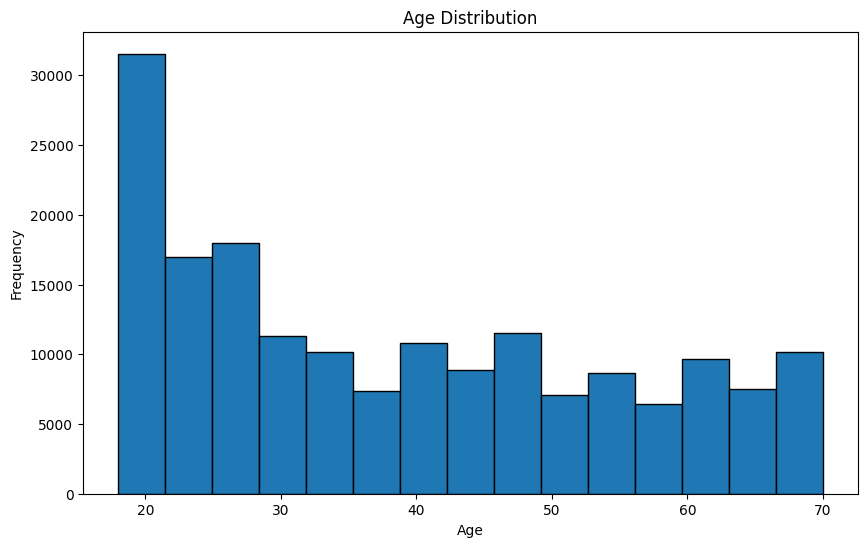

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=15, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution

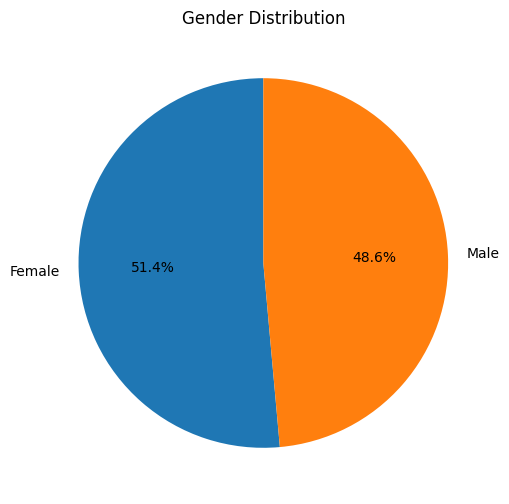

In [8]:
gender_counts = df['gender'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# Recurring vs Non Recurring

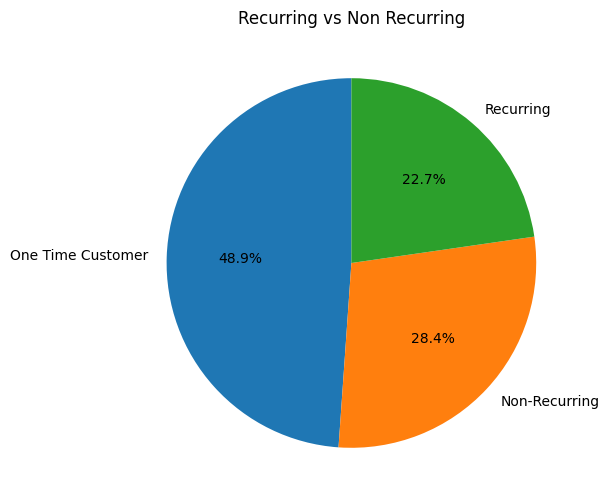

In [9]:
recurring_counts = df['recurring'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(recurring_counts, labels=recurring_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Recurring vs Non Recurring')
plt.show()

# Membership Distribution

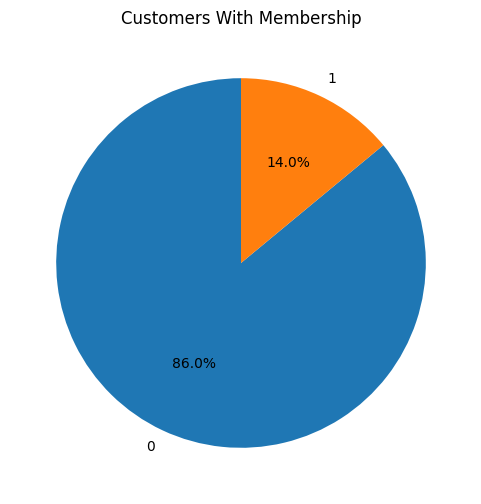

In [10]:
membership_counts = df['membership'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customers With Membership')
plt.show()

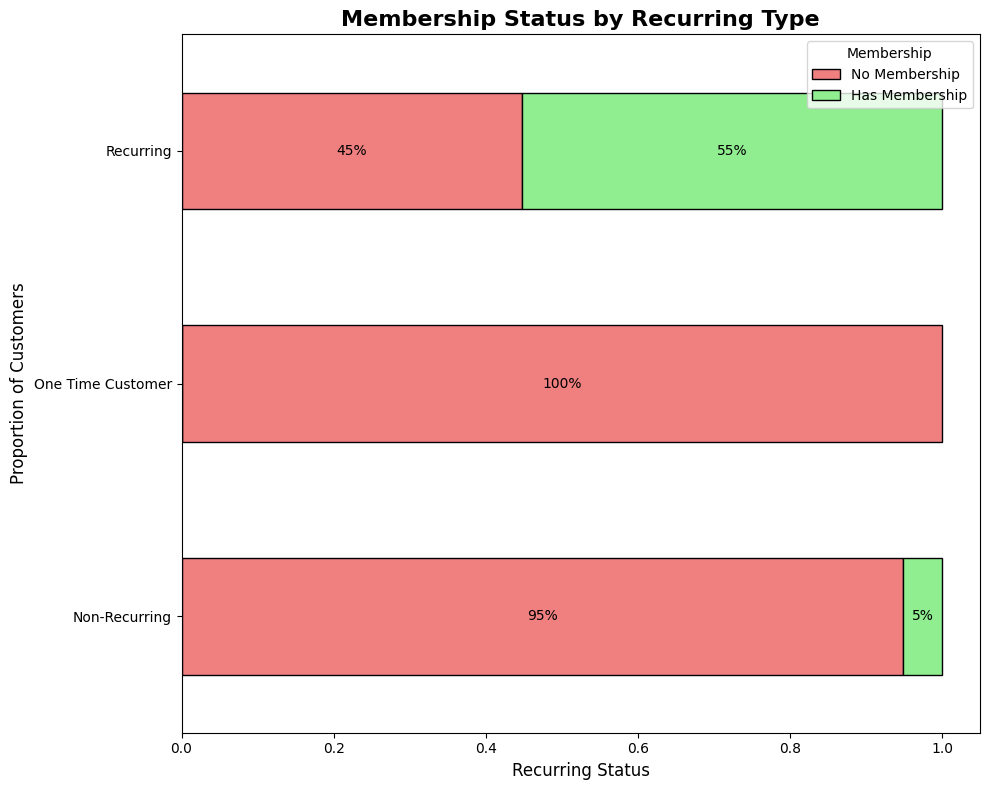

In [11]:
# Group and normalize counts to get proportions
membership_prop = (
    df
    .groupby("recurring")["membership"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "No Membership", 1: "Has Membership"})
)

# Plot
colors = ["lightcoral", "lightgreen"]  # Red for no, blue for yes

ax = membership_prop.plot(kind="barh", stacked=True, color=colors, figsize=(10, 8), edgecolor='black')

plt.title("Membership Status by Recurring Type", fontsize=16, weight='bold')
plt.xlabel("Recurring Status", fontsize=12)
plt.ylabel("Proportion of Customers", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Membership", loc="upper right")

# Add percentage labels
for i, (index, row) in enumerate(membership_prop.iterrows()):
    cum_width = 0
    for j, value in enumerate(row):
        if value > 0.01:
            plt.text(
                cum_width + value / 2,
                i,
                f"{value:.0%}",
                ha="center",
                va="center",
                color="black",
                fontsize=10,
            )
        cum_width += value

plt.tight_layout()
plt.show()

In [12]:
neighborhood_region = df.address.str.split(', ').str[-3:-1]
df["neighborhood"] = neighborhood_region.str[0]
df["region"] = neighborhood_region.str[1]

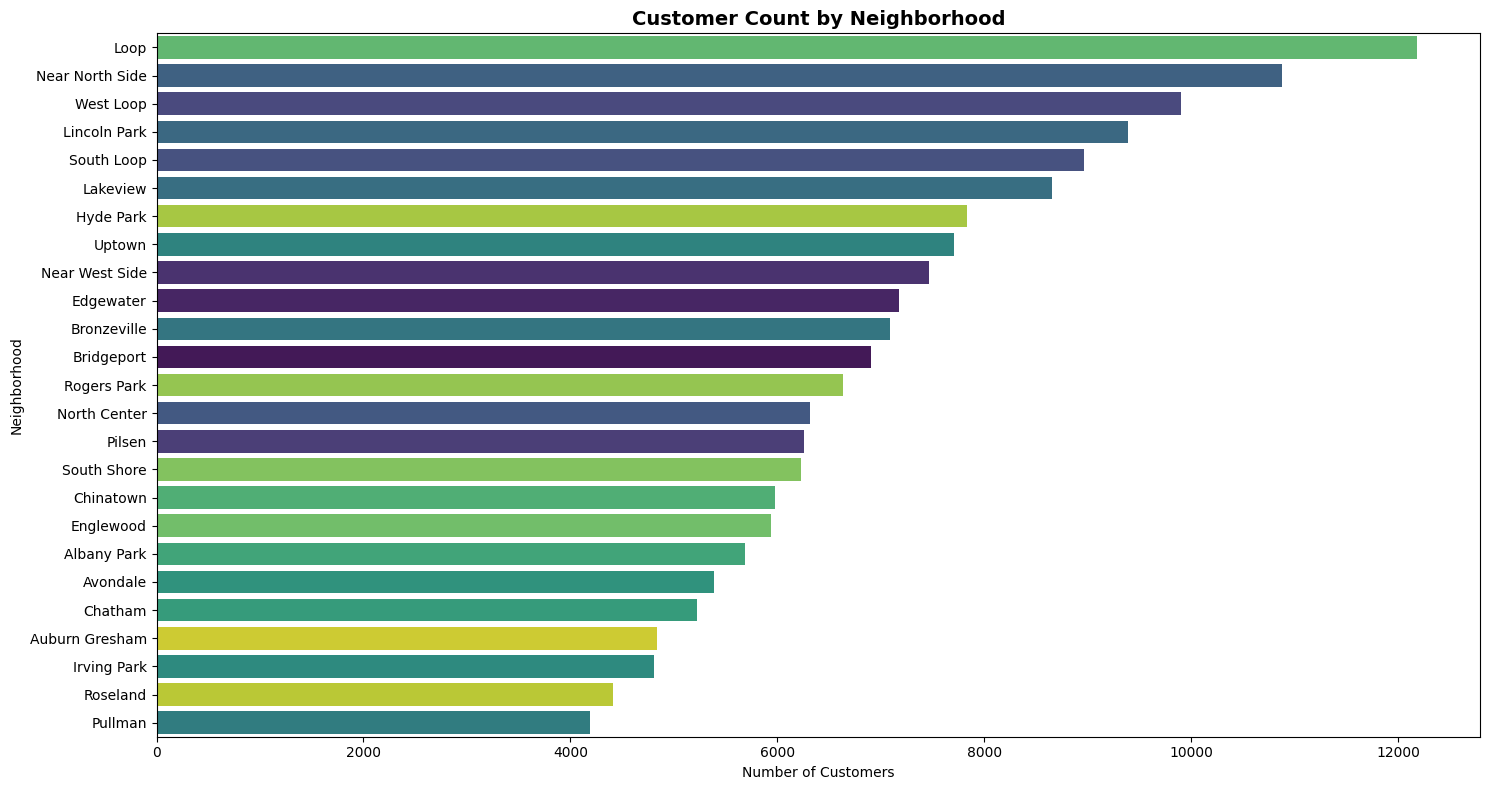

In [13]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y="neighborhood", order=df["neighborhood"].value_counts().index, palette="viridis", hue='neighborhood')
plt.title("Customer Count by Neighborhood", fontsize=14, weight='bold')
plt.xlabel("Number of Customers")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

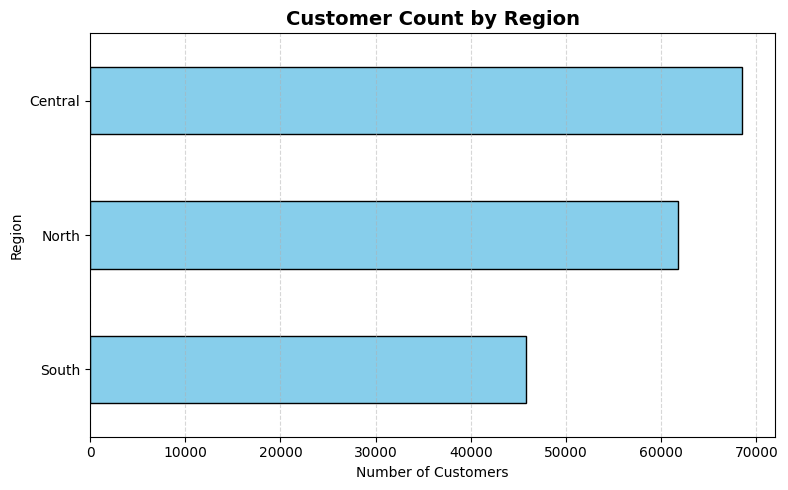

In [14]:
region_counts = df["region"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(8, 5))
region_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Customer Count by Region", fontsize=14, weight='bold')
plt.xlabel("Number of Customers")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [15]:
# character limit for SQL

df = df.drop(columns=["neighborhood", "region"])

object_cols = df.select_dtypes(include='object')

# Find value with max length in each column
max_length_values = {
    col: object_cols[col].loc[object_cols[col].str.len().idxmax()]
    for col in object_cols.columns
}

# Display results
for col, val in max_length_values.items():
    print(f"Column: {col}\nLength: {len(val)}\nValue: {val}\n{'-'*70}")

Column: customer_id
Length: 19
Value: STRMRT_CSTMR_100000
----------------------------------------------------------------------
Column: name
Length: 30
Value: Mr. Christopher Montgomery PhD
----------------------------------------------------------------------
Column: gender
Length: 6
Value: Female
----------------------------------------------------------------------
Column: phone_number
Length: 16
Value: +1(312)-636-1903
----------------------------------------------------------------------
Column: email
Length: 48
Value: mr.christophermontgomeryphd13124567821@gmail.com
----------------------------------------------------------------------
Column: address
Length: 65
Value: #6546, S Martin Luther King Jr Dr, Auburn Gresham, South, Chicago
----------------------------------------------------------------------
Column: recurring
Length: 17
Value: One Time Customer
----------------------------------------------------------------------
